In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")
pd.options.plotting.backend = "plotly"

In [ ]:
data_1 =  pd.read_csv("datafile (1).csv")
data_2 =  pd.read_csv("datafile (2).csv")
data_3 =  pd.read_csv("datafile (3).csv")
data_ =   pd.read_csv("datafile.csv")
produce = pd.read_csv("produce.csv")

In [ ]:
#info about number of nan values in dataset

print(data_.isna().sum());print("\n")
print(data_3.isna().sum())

Crop       1
2004-05    1
2005-06    1
2006-07    1
2007-08    1
2008-09    1
2009-10    1
2010-11    1
2011-12    1
dtype: int64


Crop                         0
Variety                      0
Season/ duration in days    28
Recommended Zone             1
Unnamed: 4                  78
dtype: int64


In [ ]:
#imputing or dropping nan values from dataset

data_3.drop("Unnamed: 4",axis=1,inplace=True)
data_3['Season/ duration in days'].fillna(value=data_3['Season/ duration in days'].mode()[1],inplace=True)
data_3.dropna(axis=0,inplace=True)

print(data_3.Crop.unique());print()
print(data_3.isna().sum(),end="\n");print()

['Paddy' 'Wheat' 'Barley' 'Maize' 'Pearl Millet' 'Finger Millet'
 'Indian Mustard' 'Yellow Sarson' 'Linseed' 'Groundnut' 'Sesame'
 'Chickpea ' 'Bengal Gram' 'Lentil' 'Fieldpea' 'French Bean' 'Mungbean'
 'Urdbean' 'Cluster Bean' 'Horse Gram' 'Sugarcane' 'Napier Bajra Hybrid'
 'Oat' 'Tall Fescue Grass' 'Cowpea (Fodder)' 'Jute' 'Mesta' 'Cotton'
 'Desi Cotton']

Crop                        0
Variety                     0
Season/ duration in days    0
Recommended Zone            0
dtype: int64



In [ ]:
#imputing or dropping nan values from dataset

data_.dropna(axis=0,inplace=True)

print(data_.Crop.unique());print()
print(data_.columns,end="\n");print()

['Rice' 'Wheat' 'Coarse Cereals' 'Pulses' 'Vegetables ' 'Fruits' 'Milk'
 'Eggs, Fish and Meat' 'Oilseeds' 'Sugarcane ' 'Fibers' 'All Agriculture']

Index(['Crop', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09',
       '2009-10', '2010-11', '2011-12'],
      dtype='object')



In [ ]:
df = data_.copy()

crops = np.repeat(df.Crop.unique(),df.shape[1]-1)
production = sum(list(map(lambda x: df.iloc[x,1:].tolist(),range(df.shape[0]))),[])
years = df.columns[1:].tolist()*12

In [ ]:
df = pd.DataFrame({'Crop':crops, 'Year': years, 'Production': production})
df = df.dropna().reset_index(drop=True)

In [ ]:
fig=px.bar(df,x='Crop', y="Production", animation_frame="Year", 
           animation_group="Crop", color="Crop", hover_name="Crop", range_y=[min(production),max(production)])
fig.update_layout(title="Per year production rate of Crops")
fig.show()

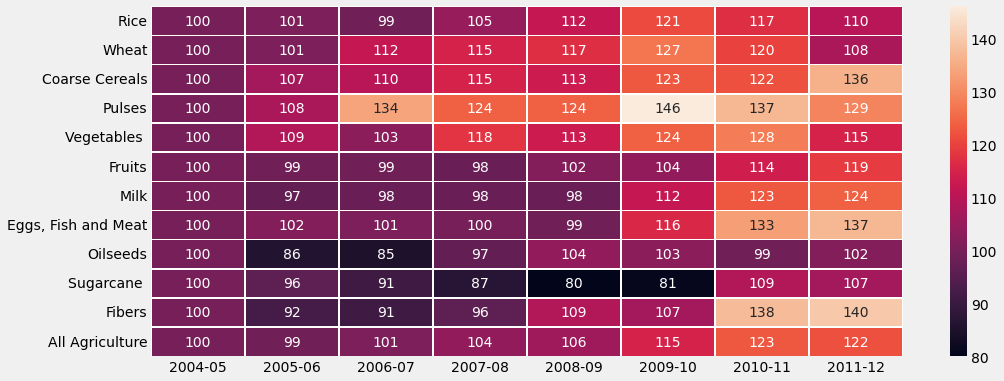

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
sns.heatmap(data_.drop('Crop',axis=1),annot=True,linewidth=.5,ax=ax,yticklabels=data_['Crop'],fmt='g')
#data_.iloc[0,1:].sum()

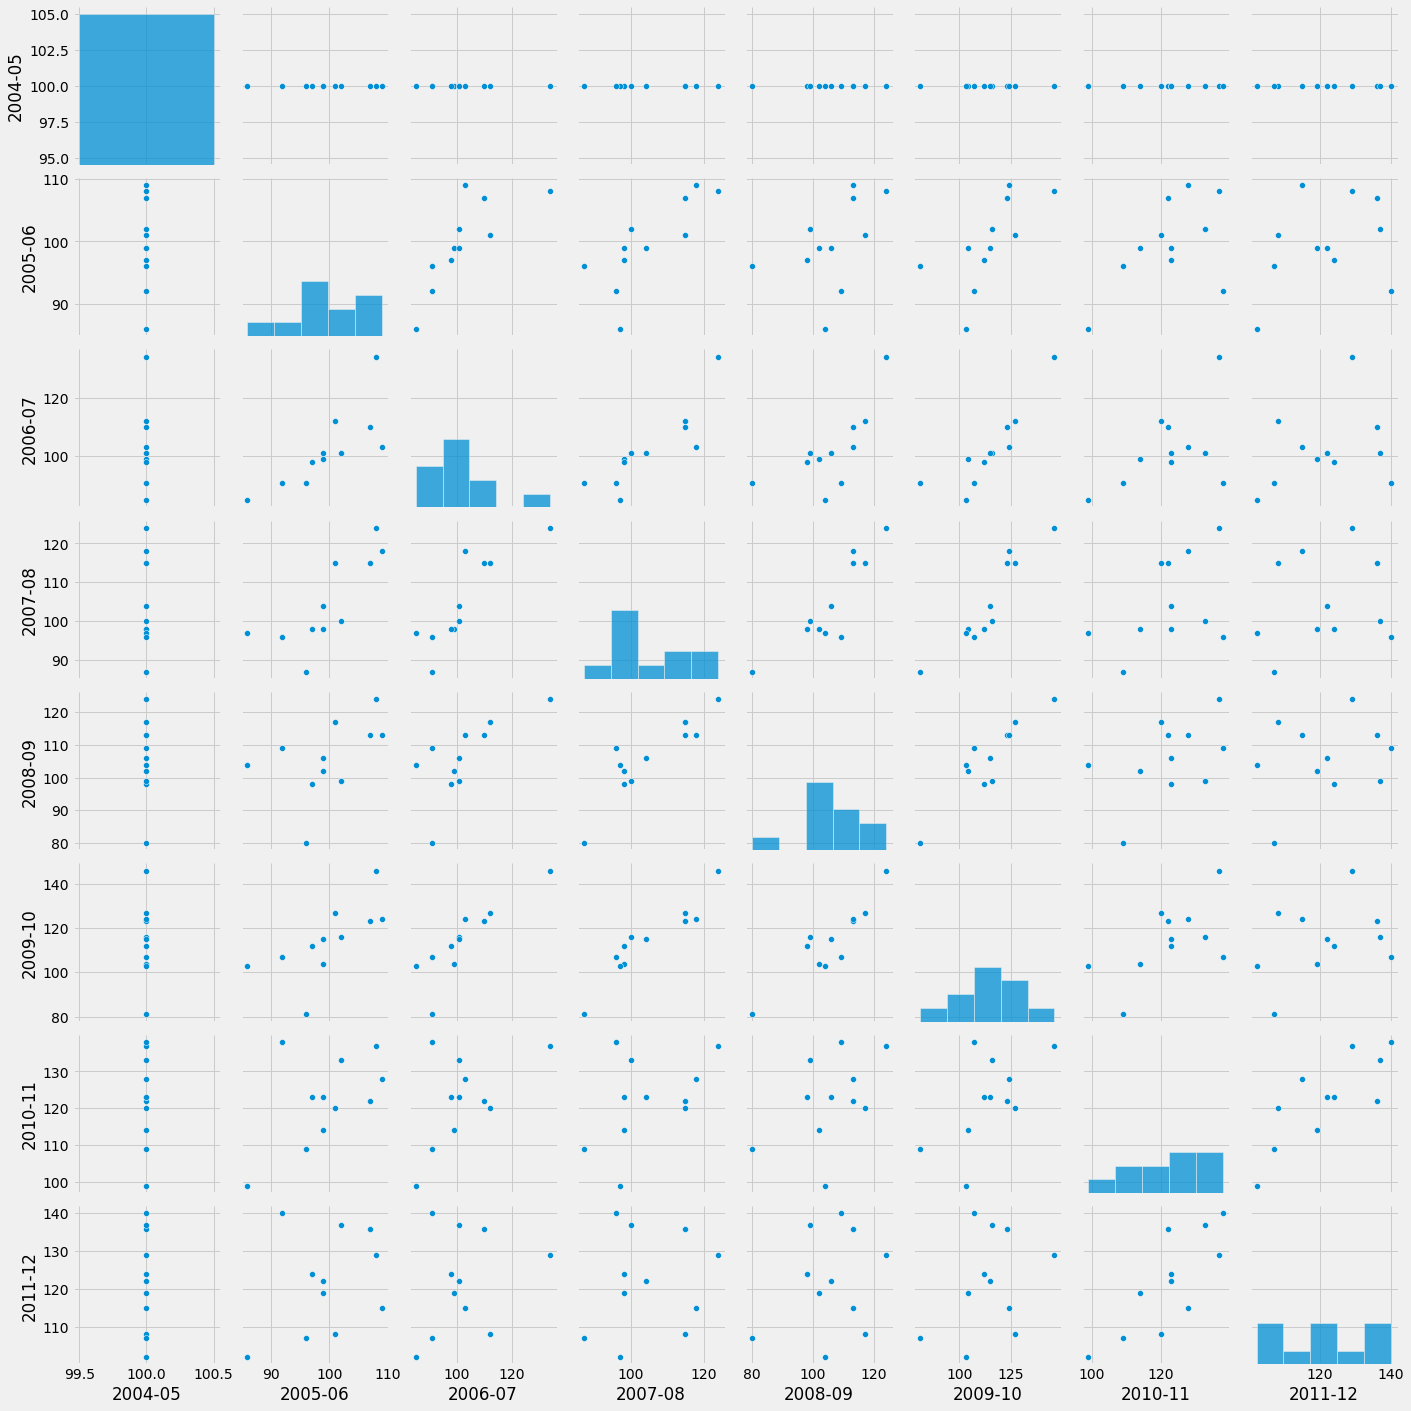

In [ ]:
sns.pairplot(data_[1:])

In [ ]:
df = data_1[data_1.drop('State',axis=1).columns[:-2]].copy()
df = df.groupby('Crop')[df.columns[1:]].mean().reset_index()

df.sample(3)

,Crop,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2
3,GROUNDNUT,21282.782,28188.076
6,PADDY,22810.140,35768.222
8,SUGARCANE,52164.716,79655.026


In [ ]:
fig = df.plot(kind='bar',x='Crop',y=df.columns[1:].tolist(),barmode='group')
fig.update_layout(showlegend=False, title='Cost of Cultivation A2+FL vs C2')
fig.show()

In [ ]:
df = data_1.iloc[:,[1,4]].copy()
df = df.groupby('State')[df.columns[-1]].mean().reset_index()
fig = df.plot(kind='bar',x='State',y=df.columns[-1], color=df.columns[-1])
fig.update_layout(title="State-wise Cost of Production (`/Quintal) C2")
fig.show()

In [ ]:
df = data_1[["State","Yield (Quintal/ Hectare) "]].copy()
df = df.groupby('State')[["Yield (Quintal/ Hectare) "]].mean().reset_index()
fig = df.plot(kind='bar',x='State',y="Yield (Quintal/ Hectare) ", color="Yield (Quintal/ Hectare) ")
fig.update_layout(title="State-wise Yield (Quintal/ Hectare)")
fig.show()

In [ ]:
df = data_2[data_2.columns[:-10]].copy().head(5)

fig = df.drop(0).plot(kind='bar',x='Crop             ', y=data_2.columns[:-10].tolist())
fig.update_layout(title='Production of Crops from 2006 to 2011')

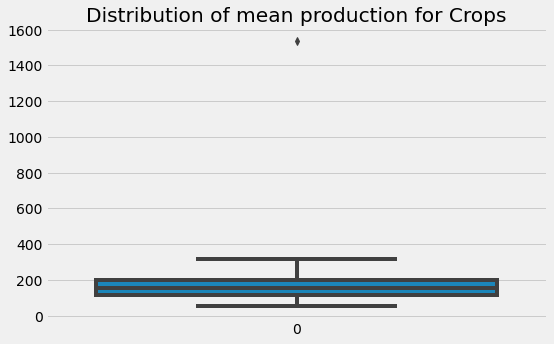

In [ ]:
mean_production = list(map(lambda x: (data_2.iloc[x,1]+data_2.iloc[x,2]+data_2.iloc[x,3]+data_2.iloc[x,4]+data_2.iloc[x,5])/5,range(data_2.shape[0])))

data_2['mean_production'] = pd.Series(mean_production)
sns.boxplot(data=data_2['mean_production'])
plt.title('Distribution of mean production for Crops')
plt.show()

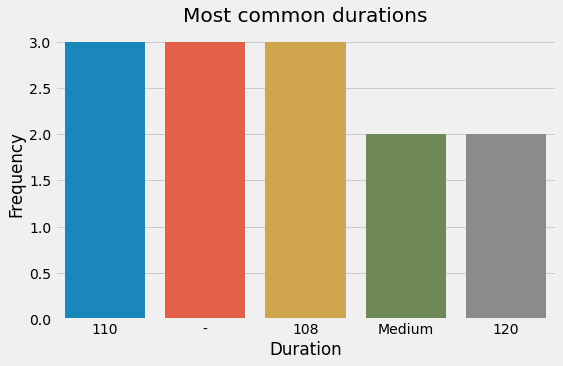

In [ ]:
new = data_3['Season/ duration in days'].value_counts().reset_index().head(5)
sns.barplot(data=new, x='index', y='Season/ duration in days')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Most common durations')
plt.show()

In [ ]:
fig = data_3['Recommended Zone'].str.split(',').str.len().reset_index()['Recommended Zone'].value_counts().reset_index().plot(kind='bar',x='index',y='Recommended Zone')
fig.update_layout(title='Number of States in which most crops are suitable to plant')
fig.show()